## Planetary craters: Craters with a name

There are seceral databases (see refs.) for planetary crater catalogues. **The quickest option (but LESS complete one)** comes from the IAU/USGS Gazetteer(https://planetarynames.wr.usgs.gov). 

<div class="alert alert-block alert-warning">
    NOTE: the exercise below is not quite accurate: craters have been extracted based on the <b>lack</b> of attributes from all nomenclature files (see Titan example below). Typically craters are the only features not to have attributes, just the name, but that is not always the case. See e.g. Titan and comparison with a published crater database (Hedgepeth, et al., 2020) vs. the subtractive output of the nomenclature.
    
See also:
    
https://planetarynames.wr.usgs.gov/Page/Rules
    
https://planetarynames.wr.usgs.gov/DescriptorTerms
</div>

Several others are available. I explicitly exclude here those where data are not freely available, i.e. those with statements such as "data available upon request". But you can ask authors, in case of interest. The only exception is Titan, where there is no other way than to extract the list from a paper PDF, and it is relatively short and simple. 

Relevant bibliography is included in the References section at the bottom.

Please note that this notebook might be incomplete and should not be used for any research work without thorough checks. 

In case of inaccuracies, please reach out to [@aprossi](https://github.com/aprossi).

Also, for general introductory information, you can access the materials from the past Europlanet GMAP Planetary Geologic Mapping Winter Schools (they do have also contextual information, not just strickly mapping) at:

https://www.planetarymapping.eu

See also: https://github.com/europlanet-gmap/winter-school-2023


<div class="alert alert-block alert-info">
    NOTE: data are loaded from geojson generated from the above nomenclature, after filtering. Geojson does not work with custom CRS, assumes EPSG:4326. If I am not mistaken this was taken out at some poitn in the past from draft specifications.. Anywya, once data are onto geopandas, a CRS can be added, see below, and e.g. exported to Geopackage, that does support custom CRS. Please see also:
    
https://github.com/europlanet-gmap/winter-school-2023/tree/main/crs
</div>

Some examples of database access/use are included in [crater_databases.ipynb](./crater_databases.ipynb)

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pyproj import CRS

In [3]:
# radii, you can fix as neeeded
# see also https://raw.githubusercontent.com/pdssp/csvforwkt/main/data/naifcodes_radii_m_wAsteroids_IAU2015.csv

r_mercury = 2439400 # 2439700(IAU)
r_venus = 6051000 # 6051800 (IAU )
r_moon = 1737400 
r_mars = 3396190 #(large semimajor)
r_ceres = 470000  # 476200 (IAU )
r_titan = 2575000  # 2574730 (IAU )
r_europa = 1560800 # 1560800 (IAU )
r_callisto = 2410300 # 2410300 (IAU )
r_ganymede = 2632345 # 2631200 (IAU )

## Earth

Data from Schmieder & Kring (2020). In this case data were extracted from an open-access article, originally in html table format. It is plenty of nice reviews but I could not find any accessible, easily parsed table of Terrestrial craters. Even very well-known Earth impact databases are finally not that accessible.

Looking up on GitHub, it seems someone web-scraped the latter, though:
see https://github.com/xnx/impact-craters/blob/master/Earth%20Impact%20Craters.ipynb

Some fixes were manually applied to the geojson below (e.g. longitude of Ilumetsa/Morasko switched). The accuracy is not extreme (2 decimal digits of degrees).

In [4]:
input = '../data/earth_schmieder_kring_2020.geojson'
earth_craters=gpd.read_file(input)

In [5]:
earth_craters.head()

,No,Impact structure,Country,Latitude,Longitude,Diameter (km),Type of target rocka,Type of impactorb,Stratigraphic age constraints,Radioisotopic age constraints,Other age constraints,Recommended age (Ma),Recommended age referencec,Pre-recalculation age (Ma),field_15,field_16,geometry
0,1,Chelyabinskd,Russia,55°58′N,60°18′E,0.007,Ice,LL-chondrite,Recent,None,"Fall February 15, 2013, main mass left 8 m-wid...",0.000006,Borovička et al.(2013),None,None,None,POINT (60.30000 55.15000)
1,2,Carancas,Peru,16°40′S,69°02′W,0.0135,Sedimentary,H-chondrite,Recent,None,"Fall September 15, 2007",0.000012,Tancredi et al.(2009),None,None,None,POINT (-69.03333 -16.66667)
2,3,Sterlitamake,Russia,53°40′N,55°59′E,0.0094,"Sedimentary (soil, loam)",IIIAB iron,Recent,None,"Fall May 17, 1990",0.000029,Petaev (1992),None,None,None,POINT (55.98333 53.66667)
3,4,Sikhote Alin (Field)f,Russia,46°09′N,134°39′E,0.027,Crystalline,IIAB iron,Recent,None,"Fall February12, 1947",0.000072,Krinov (1971),None,None,None,POINT (134.65000 46.15000)
4,5,Imilace,Chile,24°12′S,68°48′W,0.015,"Crystalline (volcanic, soil)",Pallasite,Recent,None,Found 1822 AD; fall produced ∼15 m-wide impact...,>0.0002,Buchwald (1973); Bevan (2006),None,None,None,POINT (-68.80000 -24.20000)


<AxesSubplot:>

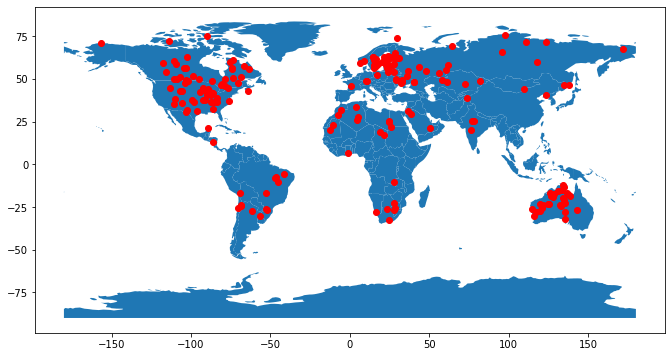

In [6]:
# plot crater location 

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax1 = world.plot(figsize=(12, 6))
earth_craters.plot(ax=ax1, c='red')

### Other Terrestrial crater databases

* A nice review is provided by Kenkmann (2021). but the table is not easily parsed
* The Earth Impact Database is not easily parsed - http://www.passc.net/EarthImpactDatabase

## The Moon

This is simply a plot of craters with a name from the official IAU/USGS gazetteer. There are other larger databases of craters, largely without a name.

Data Source USGS - https://planetarynames.wr.usgs.gov

In [7]:
input = '../data/moon_craters.geojson'
moon_craters=gpd.read_file(input)
moon_craters.head()

,Feature Name,Target,Diameter,Center Latitude,Center Longitude 360E+,Center Longitude 180E+,Coordinate System,Approval Status,Approval Date,Origin,geometry
0,8 Homeward,Moon,12.52,-12.02,97.09,97.09,"Planetographic, +East, -180 - 180",Approved,"Oct 05, 2018",Crater visible in the iconic “Earthrise” colou...,POINT (97.09000 -12.02000)
1,Abbe,Moon,63.98,-57.58,174.77,174.77,"Planetographic, +East, -180 - 180",Approved,1970,"Ernst Karl; German optician, physicist, astron...",POINT (174.77000 -57.58000)
2,Abbe H,Moon,25.13,-58.44,177.58,177.58,"Planetographic, +East, -180 - 180",Approved,2006,"Ernst Karl; German optician, physicist, astron...",POINT (177.58000 -58.44000)
3,Abbe K,Moon,26.10,-59.82,176.86,176.86,"Planetographic, +East, -180 - 180",Approved,2006,"Ernst Karl; German optician, physicist, astron...",POINT (176.86000 -59.82000)
4,Abbe M,Moon,28.61,-61.75,175.24,175.24,"Planetographic, +East, -180 - 180",Approved,2006,"Ernst Karl; German optician, physicist, astron...",POINT (175.24000 -61.75000)


In [8]:
# overwrite crs
print(CRS.from_proj4(str('+proj=latlong +R='+str(r_moon))+' +no_defs'))

moon_craters.set_crs(CRS.from_proj4(str('+proj=latlong +R='+str(r_moon))+' +no_defs'), inplace=True, allow_override=True)
moon_craters.crs

+proj=latlong +R=1737400 +no_defs +type=crs


<Geographic 2D CRS: +proj=latlong +R=1737400 +no_defs +type=crs>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Reference meridian

<AxesSubplot:>

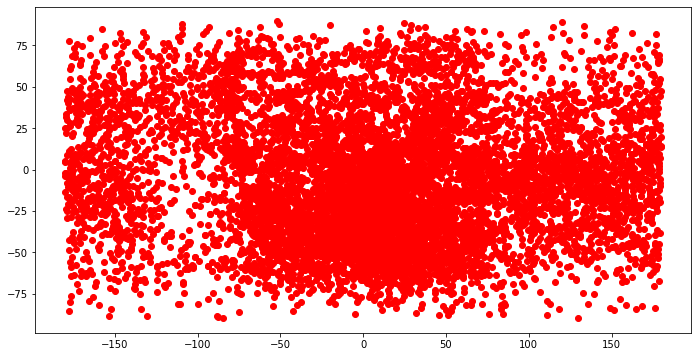

In [9]:
# plot crater location 

# moon = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# ax1 = world.plot(figsize=(12, 6))
moon_craters.plot(figsize=(12, 6),c='red')

### Other lunar crater databases

* Robbins Moon crater database - https://astrogeology.usgs.gov/search/map/Moon/Research/Craters/lunar_crater_database_robbins_2018
* Wang Moon crater database - https://zenodo.org/record/4983248#.Y_x3ly8w1qs
* Deep crater lunar database - https://figshare.com/articles/dataset/CE_DeepCraters/12768539/1
* Moon Crater database Salamuniccar - https://astrogeology.usgs.gov/search/map/Moon/Research/Craters/GoranSalamuniccar_MoonCraters

see also https://github.com/aprossi/impact-cratering/tree/main/data#planetary-crater-databases

## Mercury

This is simply a plot of craters with a name from the official IAU/USGS gazetteer. There are other larger databases of craters, largely without a name.

Data Source USGS - https://planetarynames.wr.usgs.gov

In [10]:
input = '../data/mercury_craters.geojson'
mercury_craters=gpd.read_file(input)
mercury_craters.head()

,Feature Name,Target,Diameter,Center Latitude,Center Longitude 360E+,Center Longitude 180E+,Coordinate System,Approval Status,Approval Date,Origin,geometry
0,Abedin,Mercury,116.23,61.73,349.34,-10.66,"Planetographic, +West, 0 - 360",Approved,"Jul 09, 2009",Zainul; Bangladeshi painter and printmaker (19...,POINT (-10.66000 61.73000)
1,Abu Nuwas,Mercury,117.00,17.63,338.81,-21.19,"Planetographic, +West, 0 - 360",Approved,1976,Arab poet (c. 1756-1810).,POINT (-21.19000 17.63000)
2,Africanus Horton,Mercury,140.00,-50.96,318.81,-41.19,"Planetographic, +West, 0 - 360",Approved,1976,"(James Beale); Sierra Leonean author, folklori...",POINT (-41.19000 -50.96000)
3,Ahmad Baba,Mercury,126.00,58.33,231.65,-128.35,"Planetographic, +West, 0 - 360",Approved,1979,"Abu-a;-Abbas Aj,Ad Obm Aj,Ad a;-Takruri Al-Mas...",POINT (-128.35000 58.33000)
4,Ailey,Mercury,23.00,45.58,177.92,177.92,"Planetographic, +West, 0 - 360",Approved,"Apr 24, 2012",Alvin; American dancer and choreographer (1931...,POINT (177.92000 45.58000)


In [11]:
# overwrite crs
print(CRS.from_proj4(str('+proj=latlong +R='+str(r_mercury))+' +no_defs'))

mercury_craters.set_crs(CRS.from_proj4(str('+proj=latlong +R='+str(r_mercury))+' +no_defs'), inplace=True, allow_override=True)
mercury_craters.crs

+proj=latlong +R=2439400 +no_defs +type=crs


<Geographic 2D CRS: +proj=latlong +R=2439400 +no_defs +type=crs>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Reference meridian

<AxesSubplot:>

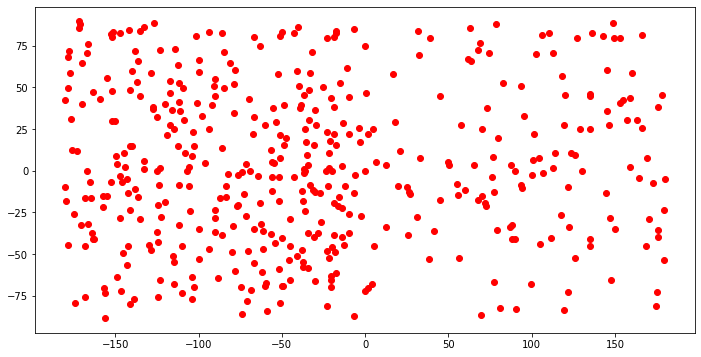

In [12]:
mercury_craters.plot(figsize=(12, 6),c='red')

### Other Mercury crater databases

* Mercury crater database (Herrick) - https://sites.google.com/alaska.edu/robertherrick/resources/mercury-global-crater-database
* Mercury crater database (Orgel) - https://data.mendeley.com/datasets/vf2sfbdvzr/1
 * Mercury crater database (Fasett) - (original Brown web down, but available from e.g. https://web.archive.org/web/20190208070832/http://www.planetary.brown.edu/html_pages/mercury_craters.htm)

## Venus

In [13]:
input = '../data/venus_craters.geojson'
venus_craters=gpd.read_file(input)
venus_craters.head()

,Feature Name,Target,Diameter,Center Latitude,Center Longitude 360E+,Center Longitude 180E+,Coordinate System,Approval Status,Approval Date,Origin,geometry
0,Abigail,Venus,18.4,-52.2,111.2,111.2,"Planetocentric, +East, 0 - 360",Approved,1994,First name from Hebrew.,POINT (111.20000 -52.20000)
1,Abika,Venus,14.5,-52.5,104.4,104.4,"Planetocentric, +East, 0 - 360",Approved,1994,Mari first name.,POINT (104.40000 -52.50000)
2,Abington,Venus,21.7,-47.8,277.7,-82.3,"Planetocentric, +East, 0 - 360",Approved,1994,Frances; English actress (1737-1815).,POINT (-82.30000 -47.80000)
3,Abra,Venus,7.2,6.2,97.4,97.4,"Planetocentric, +East, 0 - 360",Approved,1997,Ewe first name.,POINT (97.40000 6.20000)
4,Adaiah,Venus,18.0,-47.3,253.4,-106.6,"Planetocentric, +East, 0 - 360",Approved,1994,Hebrew first name.,POINT (-106.60000 -47.30000)


In [14]:
# overwrite crs
print(CRS.from_proj4(str('+proj=latlong +R='+str(r_venus))+' +no_defs'))

venus_craters.set_crs(CRS.from_proj4(str('+proj=latlong +R='+str(r_venus))+' +no_defs'), inplace=True, allow_override=True)
venus_craters.crs

+proj=latlong +R=6051000 +no_defs +type=crs


<Geographic 2D CRS: +proj=latlong +R=6051000 +no_defs +type=crs>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Reference meridian

<AxesSubplot:>

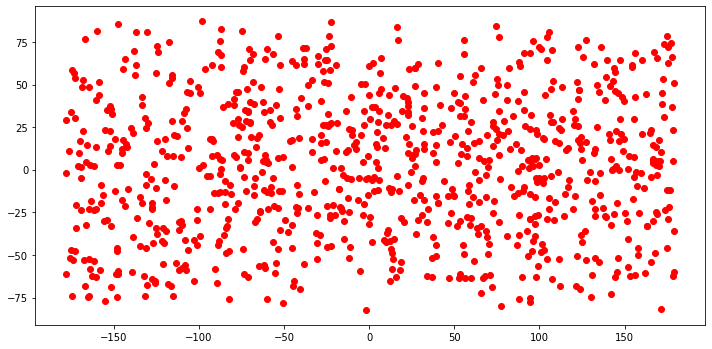

In [15]:
venus_craters.plot(figsize=(12, 6),c='red')

### Other Venus crater databases

Sources: 
* Venus Crater Database (Herrick/LPI) - https://www.lpi.usra.edu/resources/vc/vchome.html
* USGS Venus Crater database - https://astrogeology.usgs.gov/search/map/Venus
  * https://astropedia.astrogeology.usgs.gov/download/Venus/venuscraters.csv
  * https://data.mendeley.com/datasets/mn2b542k5r/2

## Mars

In [16]:
input = '../data/mars_craters.geojson'
mars_craters=gpd.read_file(input)
mars_craters.head()

,Feature Name,Target,Diameter,Center Latitude,Center Longitude 360E+,Center Longitude 180E+,Coordinate System,Approval Status,Approval Date,Origin,geometry
0,Aarna,Mars,43.00,14.70,338.43,-21.57,"Planetocentric, +East, 0 - 360",Approved,"Dec 16, 2022","Village in Rajasthan, India.",POINT (-21.57000 14.70000)
1,Aban,Mars,4.28,15.91,111.10,111.10,"Planetocentric, +East, 0 - 360",Approved,1988,Town in Russia.,POINT (111.10000 15.91000)
2,Abu,Mars,17.00,15.50,337.22,-22.78,"Planetocentric, +East, 0 - 360",Approved,"Dec 16, 2022","Village in Rajasthan, India.",POINT (-22.78000 15.50000)
3,Achar,Mars,5.36,45.43,123.16,123.16,"Planetocentric, +East, 0 - 360",Approved,1979,Town in Uruguay.,POINT (123.16000 45.43000)
4,Ada,Mars,2.09,-3.06,356.78,-3.22,"Planetocentric, +East, 0 - 360",Approved,"Sep 14, 2006","Town in Oklahoma, USA.",POINT (-3.22000 -3.06000)


In [17]:
# overwrite CRS
print(CRS.from_proj4(str('+proj=latlong +R='+str(r_mars))+' +no_defs'))

mars_craters.set_crs(CRS.from_proj4(str('+proj=latlong +R='+str(r_mars))+' +no_defs'), inplace=True, allow_override=True)
mars_craters.crs

+proj=latlong +R=3396190 +no_defs +type=crs


<Geographic 2D CRS: +proj=latlong +R=3396190 +no_defs +type=crs>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Reference meridian

<AxesSubplot:>

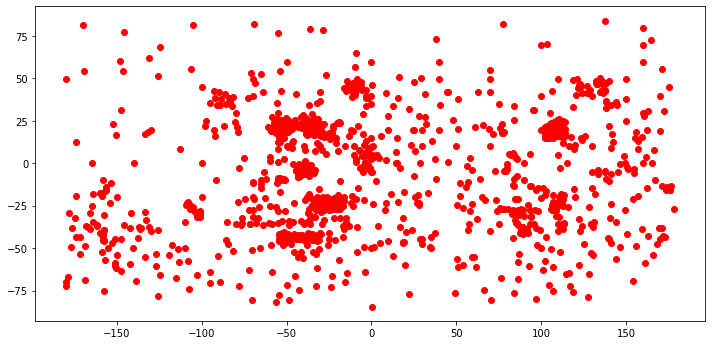

In [18]:
mars_craters.plot(figsize=(12, 6),c='red')

### Other Venus crater databases

Sources: 
* Mars Crater Database (Robbins) - https://astrogeology.usgs.gov/search/map/Mars/Research/Craters/RobbinsCraterDatabase_20120821
* Mars Crater Database (Salamunićcar) - https://astrogeology.usgs.gov/search/map/Mars/Research/Craters/GoranSalamuniccar_MarsCraters
* Mars Crater Database (Lagain) - https://github.com/alagain/martian_crater_database


## Ceres

In [19]:
input = '../data/ceres_craters.geojson'
ceres_craters=gpd.read_file(input)
ceres_craters.head()

,Feature Name,Target,Diameter,Center Latitude,Center Longitude 360E+,Center Longitude 180E+,Coordinate System,Approval Status,Approval Date,Origin,geometry
0,Abellio,Ceres,32.0,33.20,293.09,-66.91,"Planetocentric, +East, 0 - 360",Approved,"Dec 04, 2015",Gaul god of the apple tree.,POINT (-66.91000 33.20000)
1,Achita,Ceres,40.0,25.82,65.96,65.96,"Planetocentric, +East, 0 - 360",Approved,"Sep 21, 2015",Nigerian god of agriculture.,POINT (65.96000 25.82000)
2,Annona,Ceres,60.0,-48.14,8.43,8.43,"Planetocentric, +East, 0 - 360",Approved,"Dec 14, 2015",Roman goddess of crops and of the harvest.,POINT (8.43000 -48.14000)
3,Anura,Ceres,37.0,-13.92,11.79,11.79,"Planetocentric, +East, 0 - 360",Approved,"Oct 01, 2015",Arawakan (Guyana) spirit of the tobacco seeds.,POINT (11.79000 -13.92000)
4,Aristaeus,Ceres,35.8,23.43,97.68,97.68,"Planetocentric, +East, 0 - 360",Approved,"Sep 16, 2016",Greek god of agriculture.,POINT (97.68000 23.43000)


In [20]:
# overwrite CRS
print(CRS.from_proj4(str('+proj=latlong +R='+str(r_ceres))+' +no_defs'))

ceres_craters.set_crs(CRS.from_proj4(str('+proj=latlong +R='+str(r_ceres))+' +no_defs'), inplace=True, allow_override=True)
ceres_craters.crs

+proj=latlong +R=470000 +no_defs +type=crs


<Geographic 2D CRS: +proj=latlong +R=470000 +no_defs +type=crs>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Reference meridian

<AxesSubplot:>

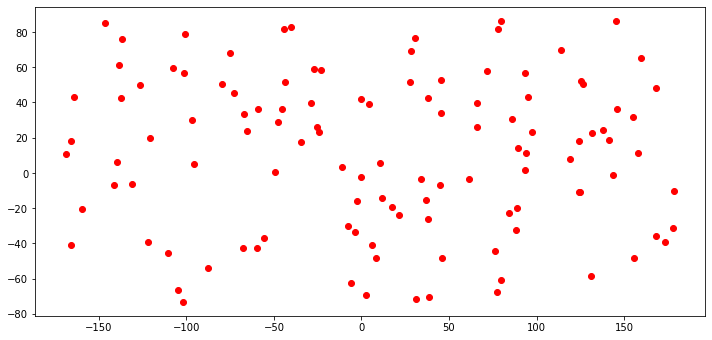

In [21]:
ceres_craters.plot(figsize=(12, 6),c='red')

### Other Ceres Crater databases

* Ceres USGS crater database (Zeilnhofer) - https://astrogeology.usgs.gov/search/map/Ceres/Dawn/Craters/ceres_dawn_fc2_craterdatabase_zeilnhofer_2020

## Europa

In [22]:
input = '../data/europa_craters.geojson'
europa_craters=gpd.read_file(input)
europa_craters.head()

,Feature Name,Target,Diameter,Center Latitude,Center Longitude 360W+,Center Longitude 360E+,Center Longitude 180E+,Coordinate System,Approval Status,Approval Date,Origin,geometry
0,Áine,Europa,5.0,-43.00,177.50,182.50,-177.50,"Planetographic, +West, 0 - 360",Approved,2000,Celtic goddess of love and fertility.,POINT (-177.50000 -43.00000)
1,Amaethon,Europa,1.7,13.82,177.47,182.53,-177.47,"Planetographic, +West, 0 - 360",Approved,2006,Celtic god of agriculture.,POINT (-177.47000 13.82000)
2,Amergin,Europa,17.0,-14.70,230.60,129.40,129.40,"Planetographic, +West, 0 - 360",Approved,2000,Legendary Irish druid and poet.,POINT (129.40000 -14.70000)
3,Angus,Europa,4.5,-12.60,75.10,284.90,-75.10,"Planetographic, +West, 0 - 360",Approved,2000,Beautiful Celtic god of love.,POINT (-75.10000 -12.60000)
4,Avagddu,Europa,10.0,1.40,169.50,190.50,-169.50,"Planetographic, +West, 0 - 360",Approved,2000,"Celtic storm deity, ill-fated son of Tegid the...",POINT (-169.50000 1.40000)


In [23]:
# overwrite CRS
print(CRS.from_proj4(str('+proj=latlong +R='+str(r_europa))+' +no_defs'))

europa_craters.set_crs(CRS.from_proj4(str('+proj=latlong +R='+str(r_europa))+' +no_defs'), inplace=True, allow_override=True)
europa_craters.crs

+proj=latlong +R=1560800 +no_defs +type=crs


<Geographic 2D CRS: +proj=latlong +R=1560800 +no_defs +type=crs>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Reference meridian

<AxesSubplot:>

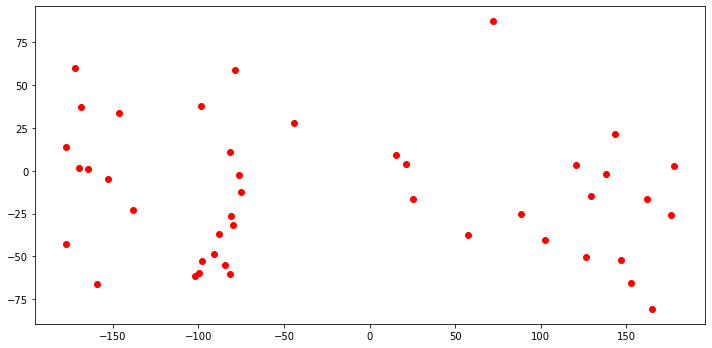

In [24]:
europa_craters.plot(figsize=(12, 6),c='red')

## Ganymede

In [25]:
input = '../data/ganymede_craters.geojson'
ganymede_craters=gpd.read_file(input)
ganymede_craters.head()

,Feature Name,Target,Diameter,Center Latitude,Center Longitude 360W+,Center Longitude 360E+,Center Longitude 180E+,Coordinate System,Approval Status,Approval Date,Origin,geometry
0,Achelous,Ganymede,40.0,61.90,11.78,348.22,-11.78,"Planetographic, +West, 0 - 360",Approved,1979,"Greek river god; father of Callirrhoe, Ganymed...",POINT (-11.78000 61.90000)
1,Adad,Ganymede,39.0,57.43,358.02,1.98,1.98,"Planetographic, +West, 0 - 360",Approved,1979,Assyro-Babylonian god of thunder.,POINT (1.98000 57.43000)
2,Adapa,Ganymede,57.0,73.08,31.32,328.68,-31.32,"Planetographic, +West, 0 - 360",Approved,1979,"Assyro-Babylonian; lost immortality when, at E...",POINT (-31.32000 73.08000)
3,Agreus,Ganymede,63.0,15.87,232.70,127.30,127.30,"Planetographic, +West, 0 - 360",Approved,1985,Hunter god in Tyre.,POINT (127.30000 15.87000)
4,Agrotes,Ganymede,74.0,60.93,192.62,167.38,167.38,"Planetographic, +West, 0 - 360",Approved,1985,Tyre; greatest god of Gebal; farmer god.,POINT (167.38000 60.93000)


In [26]:
# overwrite CRS
print(CRS.from_proj4(str('+proj=latlong +R='+str(r_ganymede))+' +no_defs'))

ganymede_craters.set_crs(CRS.from_proj4(str('+proj=latlong +R='+str(r_ganymede))+' +no_defs'), inplace=True, allow_override=True)
ganymede_craters.crs

+proj=latlong +R=2632345 +no_defs +type=crs


<Geographic 2D CRS: +proj=latlong +R=2632345 +no_defs +type=crs>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Reference meridian

<AxesSubplot:>

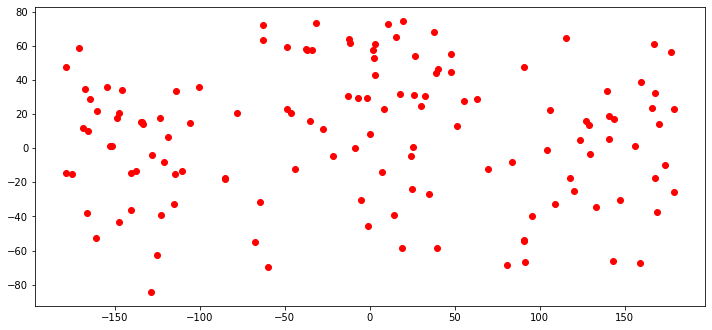

In [27]:
ganymede_craters.plot(figsize=(12, 6),c='red')

### Other Ganymede crater databases

* LPI Ganymede crater database (Schenk) - https://www.lpi.usra.edu/resources/gc/gchome.html

## Callisto

In [28]:
input = '../data/callisto_craters.geojson'
callisto_craters=gpd.read_file(input)
callisto_craters.head()

,Feature Name,Target,Diameter,Center Latitude,Center Longitude 360W+,Center Longitude 360E+,Center Longitude 180E+,Coordinate System,Approval Status,Approval Date,Origin,geometry
0,Adal,Callisto,41.7,75.5,79.7,280.3,-79.7,"Planetographic, +West, 0 - 360",Approved,1979,Norse; son of Karl and Erna.,POINT (-79.70000 75.50000)
1,Adlinda,Callisto,840.0,-48.5,35.6,324.4,-35.6,"Planetographic, +West, 0 - 360",Approved,1979,Eskimo; place in ocean depths where souls are ...,POINT (-35.60000 -48.50000)
2,Aegir,Callisto,53.9,-45.8,103.8,256.2,-103.8,"Planetographic, +West, 0 - 360",Approved,1997,Norse sea god.,POINT (-103.80000 -45.80000)
3,Agloolik,Callisto,61.6,-47.7,82.4,277.6,-82.4,"Planetographic, +West, 0 - 360",Approved,1997,Eskimo spirit of the seal caves.,POINT (-82.40000 -47.70000)
4,Ägröi,Callisto,67.4,43.2,10.9,349.1,-10.9,"Planetographic, +West, 0 - 360",Approved,1979,Finno-Ugric god of twins.,POINT (-10.90000 43.20000)


In [29]:
# overwrite CRS
print(CRS.from_proj4(str('+proj=latlong +R='+str(r_callisto))+' +no_defs'))

callisto_craters.set_crs(CRS.from_proj4(str('+proj=latlong +R='+str(r_callisto))+' +no_defs'), inplace=True, allow_override=True)
callisto_craters.crs

+proj=latlong +R=2410300 +no_defs +type=crs


<Geographic 2D CRS: +proj=latlong +R=2410300 +no_defs +type=crs>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Reference meridian

<AxesSubplot:>

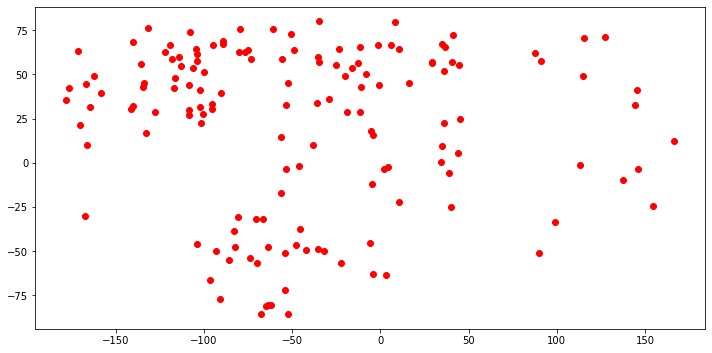

In [30]:
callisto_craters.plot(figsize=(12, 6),c='red')

### Other Callisto crater databases

* LPI Callisto crater database (Schenk) - https://www.lpi.usra.edu/resources/cc/cchome.html

## Titan

The list below overestimates the number of craters. Typically craters have no attribute (see https://planetarynames.wr.usgs.gov/SearchResults?Target=74_Titan&Feature%20Type=9_Crater,%20craters)

In the case of Titan (possible for other icy satellites, too), some features that have no attribute are not craters. The genuine crataers are just:

* Afekan
* Beag
* Forseti
* Hano
* Ksa
* Menrva
* Momoy
* Mystis
* Selk
* Sinlap

see also https://planetarynames.wr.usgs.gov/SearchResults?Target=74_Titan&Feature%20Type=9_Crater,%20craters

The list of attributes is:

Arcus, Astrum, Catena, Cavus, Chaos, Chasma, Collis, Corona, Crater, Dorsum, Eruptive, Facula, Farrum, Flexus, Fluctus, Flumen, Fossa, Fretum, Insula, Labes, Labyrinthus, Lacuna, Lacus, Landing, Large, Linea, Lingula, Macula, Mare, Mensa, Mons, Oceanus, Palus, Patera, Planitia, Planum, Plume, Promontorium, Regio, Reticulum, Rima, Rupes, Satellite, Saxum, Scopulus, Serpens, Sinus, Sulcus, Terra, Tessera, Tholus, Unda, Vallis, Vastitas, Virga, arcūs, astra, catenae, cavi, chaoses, chasmata, colles, coronae, craters, dorsa, center, faculae, farra, flexūs, fluctūs, flumina, fossae, freta, insulae, labēs, labyrinthi, lacunae, lacūs, site, ringed, lineae, lingulae, maculae, maria, mensae, montes, oceani, paludes, paterae, planitiae, plana, plumes, promontoria, regiones, reticula, rimae, rupēs, Feature, saxa, scopuli, serpentes, sinūs, sulci, terrae, tesserae, tholi, undae, valles, vastitates, virgae

In [31]:
input = '../data/titan_craters.geojson'
titan_craters=gpd.read_file(input)
titan_craters.head(4)

,Feature Name,Target,Diameter,Center Latitude,Center Longitude 360W+,Center Longitude 360E+,Center Longitude 180E+,Coordinate System,Approval Status,Approval Date,Origin,geometry
0,Aaru,Titan,0.0,10.0,340.0,20.0,20.0,"Planetographic, +West, 0 - 360",Approved,2006,Egyptian abode of the blessed dead.,POINT (20.00000 10.00000)
1,Adiri,Titan,0.0,-10.0,210.0,150.0,150.0,"Planetographic, +West, 0 - 360",Approved,2006,Melanesian afterworld where life is easier tha...,POINT (150.00000 -10.00000)
2,Afekan,Titan,115.0,25.8,200.3,159.7,159.7,"Planetographic, +West, 0 - 360",Approved,"Aug 04, 2008",New Guinea goddess of creation and knowledge w...,POINT (159.70000 25.80000)
3,Aztlan,Titan,0.0,-10.0,20.0,340.0,-20.0,"Planetographic, +West, 0 - 360",Approved,2006,Mythical land from which the Aztecs believed t...,POINT (-20.00000 -10.00000)


In [32]:
# overwrite CRS
print(CRS.from_proj4(str('+proj=latlong +R='+str(r_titan))+' +no_defs'))

titan_craters.set_crs(CRS.from_proj4(str('+proj=latlong +R='+str(r_titan))+' +no_defs'), inplace=True, allow_override=True)
titan_craters.crs

+proj=latlong +R=2575000 +no_defs +type=crs


<Geographic 2D CRS: +proj=latlong +R=2575000 +no_defs +type=crs>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Reference meridian

<AxesSubplot:>

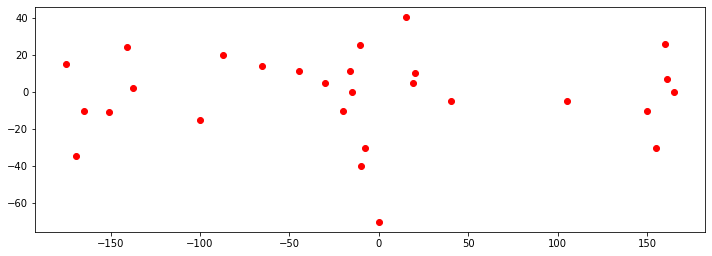

In [33]:
titan_craters.plot(figsize=(12, 6),c='red')

### Other Titan crater databases

* Database of Titan craters after Hedgepeth et al. (2020)

In [34]:
import pandas as pd 
input = '../data/titan_craters_hedgepeth.csv'
titan_craters_hedgepeth=pd.read_csv(input, sep=';')

# remove white spaces in names.....
titan_craters_hedgepeth.columns = titan_craters_hedgepeth.columns.str.replace(' ', '')

# rename longitude
titan_craters_hedgepeth.rename(columns={'Longitude' : 'Longitude 360W+'}, inplace=True)\

# change dtypes
titan_craters_hedgepeth[titan_craters_hedgepeth.columns[2:4]] = titan_craters_hedgepeth.iloc[:, 2:4].astype('float')

# add other longitudes
titan_craters_hedgepeth['Longitude 360E+'] = (360 - titan_craters_hedgepeth['Longitude 360W+']).round(decimals=2)
titan_craters_hedgepeth['Longitude 180E+'] = titan_craters_hedgepeth['Longitude 360E+'].where(titan_craters_hedgepeth['Longitude 360E+'] < 180, titan_craters_hedgepeth['Longitude 360E+']-360.0)

# # rearrange order for ease 
titan_craters_hedgepeth = titan_craters_hedgepeth[['ID', 'CraterName', 
                                                   'Longitude 360W+', 'Longitude 360E+', 'Longitude 180E+', 
                                                   'Latitude', 'Diameter(km)', 'Certainty', 'RADARSwath']]

# create geodataframe
craters_titan_hedgepeth_gdf = gpd.GeoDataFrame(
    titan_craters_hedgepeth, geometry=gpd.points_from_xy(titan_craters_hedgepeth['Longitude 180E+'], titan_craters_hedgepeth['Latitude']))

In [35]:
for columns in titan_craters_hedgepeth:
    print(columns)

ID
CraterName
Longitude 360W+
Longitude 360E+
Longitude 180E+
Latitude
Diameter(km)
Certainty
RADARSwath
geometry


In [36]:
titan_craters_hedgepeth.dtypes

ID                   object
CraterName           object
Longitude 360W+     float64
Longitude 360E+     float64
Longitude 180E+     float64
Latitude            float64
Diameter(km)        float64
Certainty             int64
RADARSwath           object
geometry           geometry
dtype: object

In [37]:
pd.set_option('display.max_rows', 100)

titan_craters_hedgepeth.head(5).sort_values(by='CraterName')

,ID,CraterName,Longitude 360W+,Longitude 360E+,Longitude 180E+,Latitude,Diameter(km),Certainty,RADARSwath,geometry
2,3*,Afekan,200.27,159.73,159.73,26.00,115.0,1,"T043, T083",POINT (159.73000 26.00000)
1,2*,Forseti,10.74,349.26,-10.74,25.76,140.0,1,"T023, T113",POINT (-10.74000 25.76000)
4,5*,Hano,344.98,15.02,15.02,40.51,105.0,1,"T016, T084, T104",POINT (15.02000 40.51000)
0,1*,Menrva,86.97,273.03,-86.97,19.98,400.0,1,"T003, T077, T108",POINT (-86.97000 19.98000)
3,4,Paxsi,341.53,18.47,18.47,5.51,115.0,2,T104,POINT (18.47000 5.51000)


In [38]:
# check on both databases 

# please note query with column name that has a space requires ` not ' (!)
check_usgs = titan_craters.query("`Feature Name` == 'Menrva'")
check_usgs

,Feature Name,Target,Diameter,Center Latitude,Center Longitude 360W+,Center Longitude 360E+,Center Longitude 180E+,Coordinate System,Approval Status,Approval Date,Origin,geometry
13,Menrva,Titan,392.0,20.1,87.2,272.8,-87.2,"Planetographic, +West, 0 - 360",Approved,2006,Etruscan goddess of wisdom.,POINT (-87.20000 20.10000)


In [39]:
check_hedgepeth = titan_craters_hedgepeth.query("CraterName == 'Menrva'")
check_hedgepeth

,ID,CraterName,Longitude 360W+,Longitude 360E+,Longitude 180E+,Latitude,Diameter(km),Certainty,RADARSwath,geometry
0,1*,Menrva,86.97,273.03,-86.97,19.98,400.0,1,"T003, T077, T108",POINT (-86.97000 19.98000)


see also: https://pubs.giss.nasa.gov/abs/lo08000d.html

Lorenz et al. 2008
Lorenz, R.D., B.W. Stiles, R.L. Kirk, M.D. Allison, P. Persi del Marmo, L. Iess, J.I. Lunine, S.J. Ostro, and S. Hensley, 2008: Titan's rotation reveals an internal ocean and changing zonal winds. Science, 319, 1649-1651, doi:10.1126/science.1151639.

_Cassini radar observations of Saturn's moon Titan over several years show that its rotational period is changing and is different from its orbital period. The present-day rotation period difference from synchronous spin leads to a shift of ∼0.36° per year in apparent longitude and is consistent with seasonal exchange of angular momentum between the surface and Titan's dense superrotating atmosphere, but only if Titan's crust is decoupled from the core by an internal water ocean like that on Europa._


Regardless, in order to account for the overestimation of craters derived by exclusion from the nomenclature, one can get out of the Titan nomenclature excerpt just:
    
* Afekan
* Beag
* Forseti
* Hano
* Ksa
* Menrva
* Momoy
* Mystis
* Selk
* Sinlap


In [40]:
# see https://planetarynames.wr.usgs.gov/SearchResults?Target=74_Titan&Feature%20Type=9_Crater,%20craters

genuine_titan_craterlist = ['Afekan','Beag','Forseti','Hano','Ksa','Menrva','Momoy','Mystis','Selk','Sinlap']

titan_genuine_craters = titan_craters.query("`Feature Name` == @genuine_titan_craterlist")
titan_genuine_craters

,Feature Name,Target,Diameter,Center Latitude,Center Longitude 360W+,Center Longitude 360E+,Center Longitude 180E+,Coordinate System,Approval Status,Approval Date,Origin,geometry
2,Afekan,Titan,115.0,25.80,200.30,159.70,159.70,"Planetographic, +West, 0 - 360",Approved,"Aug 04, 2008",New Guinea goddess of creation and knowledge w...,POINT (159.70000 25.80000)
4,Beag,Titan,27.0,-34.74,169.55,190.45,-169.55,"Planetographic, +West, 0 - 360",Approved,"Apr 15, 2015","Celtic/Irish goddess of water, education, and ...",POINT (-169.55000 -34.74000)
9,Forseti,Titan,145.0,25.53,10.40,349.60,-10.40,"Planetographic, +West, 0 - 360",Approved,"Apr 15, 2015","Norse god, the wisest and most eloquent of the...",POINT (-10.40000 25.53000)
11,Hano,Titan,100.0,40.30,345.10,14.90,14.90,"Planetographic, +West, 0 - 360",Approved,"Dec 23, 2011",Bella Coola (northwestern USA and western Cana...,POINT (14.90000 40.30000)
12,Ksa,Titan,29.0,14.00,65.40,294.60,-65.40,"Planetographic, +West, 0 - 360",Approved,"Oct 11, 2006","Lakota and Oglala (South Dakota, USA) god of w...",POINT (-65.40000 14.00000)
13,Menrva,Titan,392.0,20.10,87.20,272.80,-87.20,"Planetographic, +West, 0 - 360",Approved,2006,Etruscan goddess of wisdom.,POINT (-87.20000 20.10000)
15,Momoy,Titan,40.0,11.60,44.60,315.40,-44.60,"Planetographic, +West, 0 - 360",Approved,"Dec 23, 2011","Chumash (California, USA) ancestor shaman and ...",POINT (-44.60000 11.60000)
16,Mystis,Titan,20.0,0.07,194.86,165.14,165.14,"Planetographic, +West, 0 - 360",Approved,"Jul 20, 2015","Greek nymph, a minor deity, nurse of the god D...",POINT (165.14000 0.07000)
20,Selk,Titan,80.0,7.00,199.00,161.00,161.00,"Planetographic, +West, 0 - 360",Approved,"Feb 15, 2008","Egyptian goddess of knowledge, writing, educat...",POINT (161.00000 7.00000)
23,Sinlap,Titan,80.0,11.30,16.00,344.00,-16.00,"Planetographic, +West, 0 - 360",Approved,2006,Kachin (N. Burma) wise spirit who dwells in th...,POINT (-16.00000 11.30000)


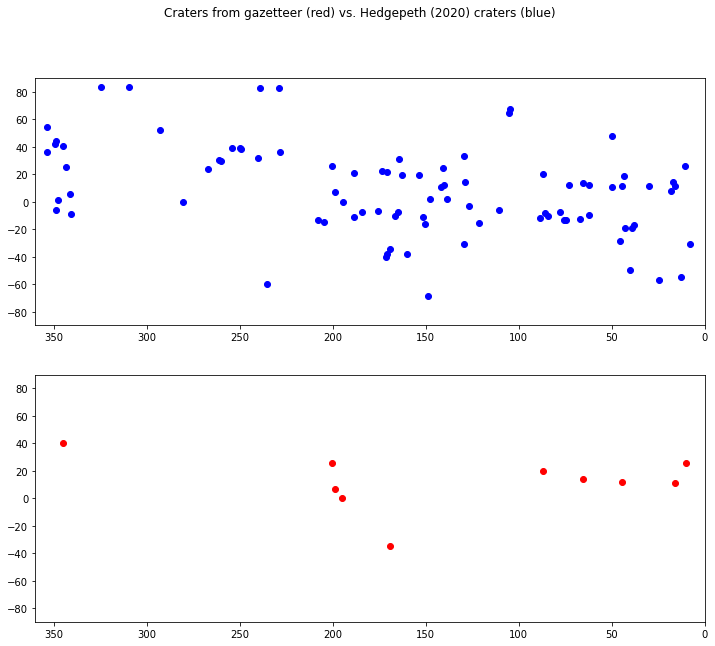

In [41]:
# Plot teh above and the craters of nomenclature
fig, axs = plt.subplots(2, figsize=(12,10))
fig.suptitle('Craters from gazetteer (red) vs. Hedgepeth (2020) craters (blue)')

axs[0].scatter(craters_titan_hedgepeth_gdf['Longitude 360W+'], craters_titan_hedgepeth_gdf['Latitude'], c='blue')
axs[0].set_xlim(0,360)
axs[0].set_ylim(-90,90)
axs[0].invert_xaxis()

axs[1].scatter(titan_genuine_craters['Center Longitude 360W+'], titan_genuine_craters['Center Latitude'], c='red')
axs[1].set_xlim(0,360)
axs[1].set_ylim(-90,90)
axs[1].invert_xaxis()



In [42]:
# save to geojson
craters_titan_hedgepeth_gdf.to_file('../data/titan_craters_hedgepeth.geojson', driver="GeoJSON")

## References

Hedgepeth, J. E., Neish, C. D., Turtle, E. P., Stiles, B. W., Kirk, R., & Lorenz, R. D. (2020). Titan's impact crater population after Cassini. Icarus, 344, 113664 - https://doi.org/10.1016/j.icarus.2020.113664

Kenkmann, T. (2021). The terrestrial impact crater record: A statistical analysis of morphologies, structures, ages, lithologies, and more. Meteoritics & Planetary Science, 56(5), 1024-1070 -  https://doi.org/10.1111/maps.13657

Lagain, A., Bouley, S., Baratoux, D., Marmo, C., Costard, F., Delaa, O., Rossi, A. P., Minin, M., Benedix, G.K., Ciocco, M. Bedos, B., Guimpier, A., Dehouck, E., Loizeau, D., Bouquety, A., Zhao, J., Vialatte, A., et al. (2021) “Mars Crater Database: A Participative Project for the Classification of the Morphological Characteristics of Large Martian Craters.” In Large Meteorite Impacts and Planetary Evolution VI, edited by Wolf Uwe Reimold and Christian Koeberl, 629–44. Geological Society of America. DOI: 10.1130/2021.2550(29). - https://doi.org/10.1130/2021.2550(29)

Lorenz et al. 2008 Lorenz, R.D., B.W. Stiles, R.L. Kirk, M.D. Allison, P. Persi del Marmo, L. Iess, J.I. Lunine, S.J. Ostro, and S. Hensley, 2008: Titan's rotation reveals an internal ocean and changing zonal winds. Science, 319, 1649-1651, https://doi:10.1126/science.1151639

Riedel, C., Michael, G. G., Orgel, C., Baum, C., van der Bogert, C. H., & Hiesinger, H. (2021). Studying the global spatial randomness of impact craters on Mercury, Venus, and the Moon with geodesic neighborhood relationships. Journal of Geophysical Research: Planets, 126(3), e2020JE006693. - https://doi.org/10.1029/2020JE006693

Robbins, S. J. (2019). A new global database of lunar impact craters> 1–2 km: 1. Crater locations and sizes, comparisons with published databases, and global analysis. Journal of Geophysical Research: Planets, 124(4), 871-892. - https://doi.org/10.1029/2018JE005592

Schmieder, M., & Kring, D. A. (2020). Earth's impact events through geologic time: a list of recommended ages for terrestrial impact structures and deposits. Astrobiology, 20(1), 91-141. https://doi.org/10.1089/ast.2019.2085

Zeilnhofer, M. (2020). A Global Analysis of Impact Craters on Ceres. ProQuest Dissertations & Theses Global, 1-251, proquest: 27963349, URL: https://search.proquest.com/openview/4e9a383f80b524bf68f755ff3649d02d

Zeilnhofer, M.F., Barlow, N.G., (2021). The morphologic and morphometric characteristics of craters on Ceres and implications for the crust. Icarus. 368, 114428. https://doi.org/10.1016/j.icarus.2021.114428

Zeilnhofer, M.F., Barlow, N.G., (2021). The Characterization and Distribution of Polygonal Impact Craters on Ceres and their Implications for the Cerean Crust. Icarus, 368, 114586, https://doi.org/10.1016/j.icarus.2021.114586

Wang, Y., Wu, B., Xue, H., Li, X., & Ma, J. (2021). An improved global catalog of lunar impact craters (≥1 km) with 3D morphometric information and updates on global crater analysis. Journal of Geophysical Research: Planets, 126, e2020JE006728. - https://doi.org/10.1029/2020JE006728